In [1]:
import numpy as np
from train_dataV4 import *
from test_data import *
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

p = 100
Ntrain = 100000
Ntest = 100000
params = 4
n = 1000

def sample_Z(Ntrain, params):
    return np.random.uniform(-1., 1., size=[Ntrain*2, params])

def generator(Z,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,params)

    return out

def discriminator(X,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,params)
        out = tf.layers.dense(h3,1)

    return out, h3


X = tf.placeholder(tf.float32,[Ntrain*2,params])
Z = tf.placeholder(tf.float32,[Ntrain*2,params])

G_sample = generator(Z)
r_logits, r_rep = discriminator(X)
f_logits, g_rep = discriminator(G_sample,reuse=True)

disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step



# sess = tf.Session(config=config)
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 256
nd_steps = 10
ng_steps = 10

x_plot, labelz = train_dataV4(p,Ntrain)

dloss = np.zeros(n)
gloss = np.zeros(n)

dX = np.zeros((n,nd_steps))
gX = np.zeros((n,ng_steps))
for i in range(n):
    X_batch,labelz = train_dataV4(p,Ntrain)
    Z_batch = sample_Z(Ntrain, params)

    for _ in range(nd_steps):
        dX[i,_], dloss[i] = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    for _ in range(ng_steps):
        gX[i,_], gloss[i] = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    print ("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss[i],gloss[i]))
    




Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Iterations: 0	 Discriminator loss: 0.9273	 Generator loss: 0.6910
Iterations: 1	 Discriminator loss: 0.7644	 Generator loss: 0.7133
Iterations: 2	 Discriminator loss: 0.6868	 Generator loss: 0.7465
Iterations: 3	 Discriminator loss: 0.6285	 Generator loss: 0.7887
Iterations: 4	 Discriminator loss: 0.5804	 Generator loss: 0.8367
Iterations: 5	 Discriminator loss: 0.5377	 Generator loss: 0.8855
Iterations: 6	 Discriminator loss: 0.5004	 Generator loss: 0.9309
Iterations: 7	 Discriminator loss: 0.4686	 Generator loss: 0.9718
Iterations: 8	 Discriminator loss: 0.4384	 Generator loss: 1.0210
Iterations: 9	 Discriminator loss: 0.4042	 Generator loss: 1.0912
Iterations: 10	 Discriminator loss: 0.3637	 Generator loss: 1.1800
Iterations: 11	 Discriminator loss: 0.3206	 Generator loss: 1.2880
Iterations: 12	 Discriminator loss: 0.2755	 Generator loss: 1.4192
Iterations: 13	 Discriminator loss: 0.2334	 Generator loss: 1.5623
Iterations: 14	 Discriminator loss: 0.1962	 Generator loss: 1.7087
Itera

Iterations: 123	 Discriminator loss: 0.0239	 Generator loss: 6.7101
Iterations: 124	 Discriminator loss: 0.0191	 Generator loss: 6.8488
Iterations: 125	 Discriminator loss: 0.0180	 Generator loss: 5.1878
Iterations: 126	 Discriminator loss: 0.0165	 Generator loss: 5.5477
Iterations: 127	 Discriminator loss: 0.0170	 Generator loss: 7.3266
Iterations: 128	 Discriminator loss: 0.0165	 Generator loss: 4.7002
Iterations: 129	 Discriminator loss: 0.0185	 Generator loss: 5.0017
Iterations: 130	 Discriminator loss: 0.0250	 Generator loss: 6.9298
Iterations: 131	 Discriminator loss: 0.0469	 Generator loss: 4.0650
Iterations: 132	 Discriminator loss: 0.0295	 Generator loss: 4.4057
Iterations: 133	 Discriminator loss: 0.0372	 Generator loss: 6.2534
Iterations: 134	 Discriminator loss: 0.0356	 Generator loss: 3.9330
Iterations: 135	 Discriminator loss: 0.0446	 Generator loss: 3.6183
Iterations: 136	 Discriminator loss: 0.0386	 Generator loss: 5.0241
Iterations: 137	 Discriminator loss: 0.0647	 Gen

Iterations: 244	 Discriminator loss: 0.3065	 Generator loss: 5.7857
Iterations: 245	 Discriminator loss: 0.3018	 Generator loss: 5.7607
Iterations: 246	 Discriminator loss: 0.2952	 Generator loss: 5.9706
Iterations: 247	 Discriminator loss: 0.2899	 Generator loss: 5.8232
Iterations: 248	 Discriminator loss: 0.2773	 Generator loss: 5.6963
Iterations: 249	 Discriminator loss: 0.2658	 Generator loss: 5.6594
Iterations: 250	 Discriminator loss: 0.2558	 Generator loss: 5.5897
Iterations: 251	 Discriminator loss: 0.2456	 Generator loss: 5.4501
Iterations: 252	 Discriminator loss: 0.2415	 Generator loss: 5.4123
Iterations: 253	 Discriminator loss: 0.2359	 Generator loss: 5.3583
Iterations: 254	 Discriminator loss: 0.2367	 Generator loss: 5.3356
Iterations: 255	 Discriminator loss: 0.2273	 Generator loss: 5.3672
Iterations: 256	 Discriminator loss: 0.2243	 Generator loss: 5.4427
Iterations: 257	 Discriminator loss: 0.2252	 Generator loss: 5.3505
Iterations: 258	 Discriminator loss: 0.2247	 Gen

Iterations: 365	 Discriminator loss: 0.5222	 Generator loss: 2.0986
Iterations: 366	 Discriminator loss: 0.5120	 Generator loss: 2.0653
Iterations: 367	 Discriminator loss: 0.5171	 Generator loss: 2.0163
Iterations: 368	 Discriminator loss: 0.5403	 Generator loss: 2.1222
Iterations: 369	 Discriminator loss: 0.5607	 Generator loss: 2.2338
Iterations: 370	 Discriminator loss: 0.5772	 Generator loss: 2.3197
Iterations: 371	 Discriminator loss: 0.5870	 Generator loss: 2.3763
Iterations: 372	 Discriminator loss: 0.5971	 Generator loss: 2.3638
Iterations: 373	 Discriminator loss: 0.5890	 Generator loss: 2.3650
Iterations: 374	 Discriminator loss: 0.5442	 Generator loss: 2.4368
Iterations: 375	 Discriminator loss: 0.5181	 Generator loss: 2.4892
Iterations: 376	 Discriminator loss: 0.4999	 Generator loss: 2.9593
Iterations: 377	 Discriminator loss: 0.4831	 Generator loss: 2.7111
Iterations: 378	 Discriminator loss: 0.4683	 Generator loss: 2.1922
Iterations: 379	 Discriminator loss: 0.4613	 Gen

Iterations: 486	 Discriminator loss: 0.5740	 Generator loss: 2.0549
Iterations: 487	 Discriminator loss: 0.5745	 Generator loss: 1.8060
Iterations: 488	 Discriminator loss: 0.5799	 Generator loss: 1.9584
Iterations: 489	 Discriminator loss: 0.5803	 Generator loss: 1.9736
Iterations: 490	 Discriminator loss: 0.5733	 Generator loss: 1.9539
Iterations: 491	 Discriminator loss: 0.5714	 Generator loss: 1.9204
Iterations: 492	 Discriminator loss: 0.5702	 Generator loss: 1.9051
Iterations: 493	 Discriminator loss: 0.5661	 Generator loss: 1.9462
Iterations: 494	 Discriminator loss: 0.5703	 Generator loss: 1.9820
Iterations: 495	 Discriminator loss: 0.5756	 Generator loss: 2.0708
Iterations: 496	 Discriminator loss: 0.5800	 Generator loss: 2.1497
Iterations: 497	 Discriminator loss: 0.5999	 Generator loss: 2.3196
Iterations: 498	 Discriminator loss: 0.5893	 Generator loss: 2.1223
Iterations: 499	 Discriminator loss: 0.5609	 Generator loss: 2.4087
Iterations: 500	 Discriminator loss: 0.5779	 Gen

Iterations: 607	 Discriminator loss: 1.0754	 Generator loss: 1.0009
Iterations: 608	 Discriminator loss: 1.0754	 Generator loss: 0.9389
Iterations: 609	 Discriminator loss: 1.0652	 Generator loss: 0.9084
Iterations: 610	 Discriminator loss: 1.0368	 Generator loss: 1.0265
Iterations: 611	 Discriminator loss: 1.0006	 Generator loss: 1.0921
Iterations: 612	 Discriminator loss: 0.9720	 Generator loss: 1.1347
Iterations: 613	 Discriminator loss: 1.0025	 Generator loss: 1.0507
Iterations: 614	 Discriminator loss: 1.0692	 Generator loss: 0.9420
Iterations: 615	 Discriminator loss: 1.1158	 Generator loss: 0.9189
Iterations: 616	 Discriminator loss: 1.1368	 Generator loss: 0.9196
Iterations: 617	 Discriminator loss: 1.1413	 Generator loss: 0.9150
Iterations: 618	 Discriminator loss: 1.1392	 Generator loss: 0.9083
Iterations: 619	 Discriminator loss: 1.1364	 Generator loss: 0.8758
Iterations: 620	 Discriminator loss: 1.1378	 Generator loss: 0.8294
Iterations: 621	 Discriminator loss: 1.1244	 Gen

Iterations: 728	 Discriminator loss: 1.3437	 Generator loss: 0.7271
Iterations: 729	 Discriminator loss: 1.3394	 Generator loss: 0.7274
Iterations: 730	 Discriminator loss: 1.3414	 Generator loss: 0.7187
Iterations: 731	 Discriminator loss: 1.3353	 Generator loss: 0.7312
Iterations: 732	 Discriminator loss: 1.3433	 Generator loss: 0.7206
Iterations: 733	 Discriminator loss: 1.3288	 Generator loss: 0.7388
Iterations: 734	 Discriminator loss: 1.3420	 Generator loss: 0.7253
Iterations: 735	 Discriminator loss: 1.3288	 Generator loss: 0.7393
Iterations: 736	 Discriminator loss: 1.3359	 Generator loss: 0.7329
Iterations: 737	 Discriminator loss: 1.3276	 Generator loss: 0.7373
Iterations: 738	 Discriminator loss: 1.3355	 Generator loss: 0.7322
Iterations: 739	 Discriminator loss: 1.3286	 Generator loss: 0.7410
Iterations: 740	 Discriminator loss: 1.3367	 Generator loss: 0.7279
Iterations: 741	 Discriminator loss: 1.3230	 Generator loss: 0.7379
Iterations: 742	 Discriminator loss: 1.3391	 Gen

Iterations: 849	 Discriminator loss: 1.3350	 Generator loss: 0.6782
Iterations: 850	 Discriminator loss: 1.3255	 Generator loss: 0.6904
Iterations: 851	 Discriminator loss: 1.3372	 Generator loss: 0.6752
Iterations: 852	 Discriminator loss: 1.3288	 Generator loss: 0.6901
Iterations: 853	 Discriminator loss: 1.3361	 Generator loss: 0.6757
Iterations: 854	 Discriminator loss: 1.3243	 Generator loss: 0.6927
Iterations: 855	 Discriminator loss: 1.3349	 Generator loss: 0.6803
Iterations: 856	 Discriminator loss: 1.3314	 Generator loss: 0.6847
Iterations: 857	 Discriminator loss: 1.3331	 Generator loss: 0.6792
Iterations: 858	 Discriminator loss: 1.3255	 Generator loss: 0.6849
Iterations: 859	 Discriminator loss: 1.3354	 Generator loss: 0.6538
Iterations: 860	 Discriminator loss: 1.3227	 Generator loss: 0.7000
Iterations: 861	 Discriminator loss: 1.3359	 Generator loss: 0.6838
Iterations: 862	 Discriminator loss: 1.3298	 Generator loss: 0.6818
Iterations: 863	 Discriminator loss: 1.3286	 Gen

Iterations: 970	 Discriminator loss: 1.3100	 Generator loss: 0.6990
Iterations: 971	 Discriminator loss: 1.3213	 Generator loss: 0.6745
Iterations: 972	 Discriminator loss: 1.3097	 Generator loss: 0.7008
Iterations: 973	 Discriminator loss: 1.3202	 Generator loss: 0.6800
Iterations: 974	 Discriminator loss: 1.3104	 Generator loss: 0.6948
Iterations: 975	 Discriminator loss: 1.3190	 Generator loss: 0.6784
Iterations: 976	 Discriminator loss: 1.3083	 Generator loss: 0.6978
Iterations: 977	 Discriminator loss: 1.3215	 Generator loss: 0.6708
Iterations: 978	 Discriminator loss: 1.3082	 Generator loss: 0.6999
Iterations: 979	 Discriminator loss: 1.3205	 Generator loss: 0.6804
Iterations: 980	 Discriminator loss: 1.3103	 Generator loss: 0.6976
Iterations: 981	 Discriminator loss: 1.3186	 Generator loss: 0.6832
Iterations: 982	 Discriminator loss: 1.3089	 Generator loss: 0.6951
Iterations: 983	 Discriminator loss: 1.3192	 Generator loss: 0.6668
Iterations: 984	 Discriminator loss: 1.3055	 Gen

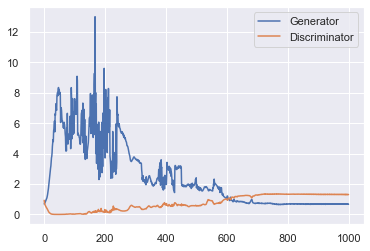

In [2]:
x = np.arange(n)
plt.plot(x,gloss, label = 'Generator')
plt.plot(x,dloss, label = 'Discriminator')
plt.legend()

<ipython-input-3-b5daad352a1e>:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-3-b5daad352a1e>:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


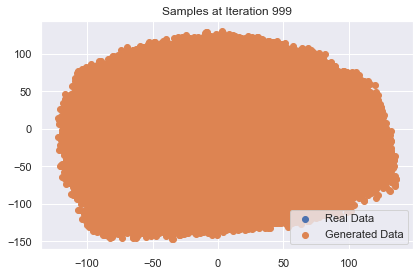

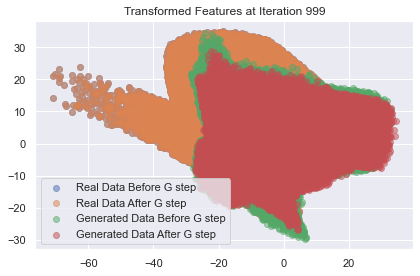

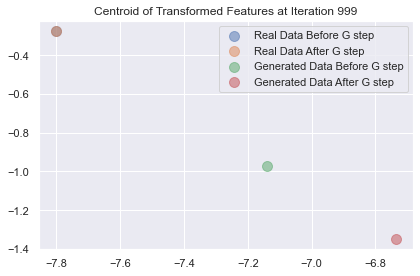

In [3]:
plt.figure()
g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
xax = plt.scatter(x_plot[:,0], x_plot[:,1])
gax = plt.scatter(g_plot[:,0],g_plot[:,1])

plt.legend((xax,gax), ("Real Data","Generated Data"))
plt.title('Samples at Iteration %d'%i)
plt.tight_layout()


plt.figure()
rrd = plt.scatter(rrep_dstep[:,0], rrep_dstep[:,1], alpha=0.5)
rrg = plt.scatter(rrep_gstep[:,0], rrep_gstep[:,1], alpha=0.5)
grd = plt.scatter(grep_dstep[:,0], grep_dstep[:,1], alpha=0.5)
grg = plt.scatter(grep_gstep[:,0], grep_gstep[:,1], alpha=0.5)


plt.legend((rrd, rrg, grd, grg), ("Real Data Before G step","Real Data After G step",
                               "Generated Data Before G step","Generated Data After G step"))
plt.title('Transformed Features at Iteration %d'%i)
plt.tight_layout()

plt.figure()

rrdc = plt.scatter(np.mean(rrep_dstep[:,0]), np.mean(rrep_dstep[:,1]),s=100, alpha=0.5)
rrgc = plt.scatter(np.mean(rrep_gstep[:,0]), np.mean(rrep_gstep[:,1]),s=100, alpha=0.5)
grdc = plt.scatter(np.mean(grep_dstep[:,0]), np.mean(grep_dstep[:,1]),s=100, alpha=0.5)
grgc = plt.scatter(np.mean(grep_gstep[:,0]), np.mean(grep_gstep[:,1]),s=100, alpha=0.5)

plt.legend((rrdc, rrgc, grdc, grgc), ("Real Data Before G step","Real Data After G step",
                               "Generated Data Before G step","Generated Data After G step"))

plt.title('Centroid of Transformed Features at Iteration %d'%i)
plt.tight_layout()

# Part 2

In [36]:
# example of training an conditional gan on the fashion mnist dataset
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv1DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Concatenate

# define the standalone discriminator model
def define_discriminator(in_shape=(4,1), n_classes=2):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 2)(in_label)
	# scale up to image dimensions with linear activation
	n_nodes = in_shape[0] * in_shape[1]
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((in_shape[0], in_shape[1]))(li)
	# image input
	in_image = Input(shape=in_shape)
	# concat label as a channel
	merge = Concatenate()([in_image, li])
	# downsample
	fe = Conv1D(128, (1), strides=(1), padding='same')(merge)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv1D(128, (1), strides=(1), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	# flatten feature maps
	fe = Flatten()(fe)
	# dropout
	fe = Dropout(0.4)(fe)
	# output
	out_layer = Dense(1, activation='sigmoid')(fe)
	# define model
	model = Model([in_image, in_label], out_layer)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim, n_classes=2):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 2)(in_label)
	# linear multiplication
	n_nodes = 4 * 1
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((4, 1))(li)
	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 7x7 image
	n_nodes = 128 * 4
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((4,128))(gen)
	# merge image gen and label input
	merge = Concatenate()([gen, li])
	# upsample to 14x14
	gen = Conv1DTranspose(128, (1), strides=(1), padding='same')(merge)
	gen = LeakyReLU(alpha=0.2)(gen)
	# upsample to 28x28
	gen = Conv1DTranspose(128, (1), strides=(1), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# output
	out_layer = Conv1D(1, (1), activation='tanh', padding='same')(gen)
	# define model
	model = Model([in_lat, in_label], out_layer)
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# get noise and label inputs from generator model
	gen_noise, gen_label = g_model.input
	# get image output from the generator model
	gen_output = g_model.output
	# connect image output and label input from generator as inputs to discriminator
	gan_output = d_model([gen_output, gen_label])
	# define gan model as taking noise and label and outputting a classification
	model = Model([gen_noise, gen_label], gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model


# # select real samples
def generate_real_samples(Ntrain, params):
    train, train_vals = train_dataV4(p,Ntrain)
    y = ones((Ntrain, 1))
    X = np.array(train), np.array(train_vals)
    return train, train_vals,y

# generate points in latent space as input for the generator
def generate_latent_points(Ntrain, params, n_classes=2):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(Ntrain, params):
    y = ones((Ntrain, 1))
    return np.random.uniform(0., 1., size=[Ntrain*2, params]),y

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset,labels,y, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, labels_real, y_real = generate_real_samples(Ntrain, params)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
			# generate 'fake' examples
			[X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
			# prepare points in latent space as input for the generator
			[z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
	# save the generator model
	g_model.save('cgan_generator.h5')

# size of the latent space
latent_dim = params
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset,labels,y = generate_real_samples(Ntrain, params)
# train model
train(g_model, d_model, gan_model, dataset,labels,y, latent_dim)

In [37]:
test,test_vals = test_data(p,Ntrain)

gan_model.predict([test,test_vals])

array([[0.5459937 ],
       [0.5375242 ],
       [0.5497191 ],
       ...,
       [0.5499727 ],
       [0.54591054],
       [0.5443693 ]], dtype=float32)

In [38]:
A = g_model.predict([test,test_vals])

(0.0, 400.0)

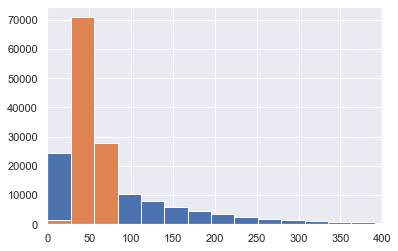

In [39]:
n,bins,weights = plt.hist(test[test_vals==0,3], bins = 40)
plt.hist(test[test_vals==1,3], bins = bins)
plt.xlim(0,400)

(array([23403.,  7669.,  4812.,  3729.,  2198.,  1199.,   976.,   793.,
          681.,   624.,   641.,   584.,   489.,   486.,   500.,   425.,
          459.,   436.,   439.,   393.,   419.,   388.,   393.,   436.,
          458.,   463.,   464.,   467.,   435.,   496.,   529.,   547.,
          593.,   685.,   871.,   990.,  1175.,  1666.,  2937., 34652.]),
 array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
        -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
        -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
         0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
         0.8 ,  0.85,  0.9 ,  0.95,  1.  ], dtype=float32),
 <BarContainer object of 40 artists>)

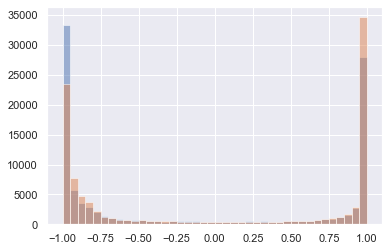

In [40]:
n,bins,weights = plt.hist(A[test_vals==0,3], bins = 40, alpha = 0.5)
plt.hist(A[test_vals==1,3], bins = bins, alpha = 0.5)

In [41]:
print(gan_model)

# References

"Building a simple Generative Adversarial Network (GAN) using TensorFlow", Dillon Aadil Hayat, https://blog.paperspace.com/implementing-gans-in-tensorflow/

"How to Develop a Conditional GAN (cGAN) From Scratch", Jason Brownlee, https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/